In [2]:
#Setup
from dotenv import load_dotenv
import os
from qiskit_ibm_provider import IBMProvider
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

load_dotenv()
key = os.getenv("IMBQ_KEY")
provider = IBMProvider()

Exercise 2 -> Launch, on a AerSimulator (local), a quantum circuit with 1 qubit, the Hadamard gate and 500 shots 

In [3]:
# Create the quantum circuit with 1 qubit
qc = QuantumCircuit(1)
# apply the Hadamard gate to the fist qubit
qc.h(0)
# launch the measure on each qubit
qc.measure_all()

print(qc.draw())

        ┌───┐ ░ ┌─┐
     q: ┤ H ├─░─┤M├
        └───┘ ░ └╥┘
meas: 1/═════════╩═
                 0 


In [4]:
# Create  a Aer simulator (launched in local) 
simulator = AerSimulator()
# Launch the circuit onto the simulator with 500 shots
result = simulator.run(qc, shots=500).result()
data = result.get_counts(0)

total = sum(data.values())
#Clean data to have proportion of states |0⟩ and |1⟩  
data = {key: value/total for key, value in data.items()}

print(data)

{'0': 0.534, '1': 0.466}


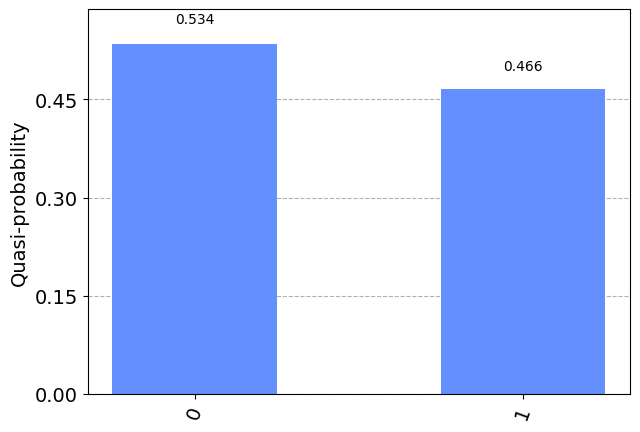

In [5]:
plot_histogram([data])

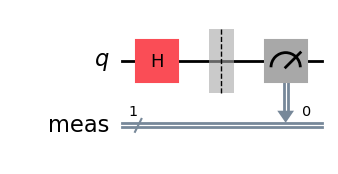

In [6]:
qc.draw('mpl')